In [ ]:
#Importacion de librerias tensorflow, numpy y keras

import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd

#Declaracion de matrices de entrada, 3 neuronas de entrada. 1 Neurona de salida
#Tag1: PH202TE: Temperatura Precalentador
#Tag2: FH206ATE: Temperatura Hood
#Tag3: KD205AIT: Corriente Motor Horno CAL2
#Tag4: Calidad_CAL

'''
# Datos desde un csv a un dataframe de Pandas 
df = pd.read_csv("datos.csv", sep=",",header=None)

#Dataframe pandas a array numpy
data = np.array(df)

campo_4 = data[:, 3]
print("Valor de salida:")
for i, value in enumerate(campo_4):
    print("Linea {}: {}".format(i+1, value))

Tags=np.array(df)
'''

Tags=np.array([[-41,-40,-38],[-11,-11,-11],[8,8,9],[7,9,9],[10,12,12],[14,14,16],[14,15,16]], dtype=float )
#Calidad_CAL no se toca (por el momento)
Calidad_CAL=np.array([-40,-11,8,9,12,14,16], dtype=float)

In [ ]:
#Definicion del modelo de red neuronal

entrada=tf.keras.layers.Dense(units=3)
oculta=tf.keras.layers.Dense(units=5)
salida=tf.keras.layers.Dense(units=1)
modelo=tf.keras.Sequential([entrada,oculta,salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error' 
       )

In [ ]:
print("Comenzando entrenamiento")
historial =modelo.fit(Tags,Calidad_CAL,epochs=100,verbose=1)
print("modelo entrenado")

Comenzando entrenamiento
Epoch 1/100
1/1 [==============================] - 1s 606ms/step - loss: 488.7581
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 3.3941
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 91.9557
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 54.2050
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 1.4088
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 70.3686
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 58.2495
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 4.9526
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 16.9671
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 49.3169
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 31.0621
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 2.6718
Epoch 13/100
1/1 [=====

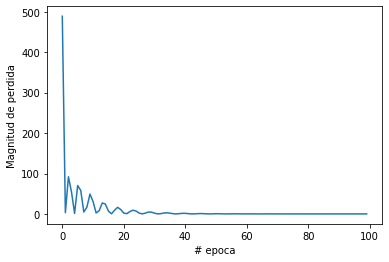

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [ ]:
print("Prediccion")
resultado=modelo.predict([[21,21,21]])
print("El resulado es"+ str (resultado) + "Calidad_CAL")

Prediccion
1/1 [==============================] - 0s 95ms/step
El resulado es[[21.155785]]Calidad_CAL


In [ ]:
print("variables internas del modelo")
#print(entrada.get_weights())
print(oculta.get_weights())
#print(salida.get_weights())

variables internas del modelo
[array([[ 0.0793427 , -0.23427449,  0.08292226,  0.8707059 ,  0.34754187],
       [ 0.12343159,  0.5414168 , -0.96165395,  0.07504895, -0.23300424],
       [ 0.6086956 ,  0.0843217 , -0.13993949, -0.0127717 , -0.2745481 ]],
      dtype=float32), array([ 0.12164344,  0.03672606, -0.01341813, -0.19025901, -0.31247357],
      dtype=float32)]


# Nueva sección

# Nueva sección